# Haberman's Survival Dataset (EDA)

### Haberman's Survival Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set 
  
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### OBJECTIVE :
To classify the patients who had undergone surgery for breast cancer on the basis of how many years they survived.

#### ATTRIBUTE INFORMATION :
    1. age : patient's age at the time of operation
    2. operation_year : year of operaion (from 1958 to 1970)
    3. axil_nodes : number of positive axil nodes present.
    4. surv_status (class attribute) : 1 = patient survived 5 years or longer
                                       2 = patient died within 5 years

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 

haberman = pd.read_csv("haberman.csv")

In [15]:
print(haberman.shape)

(305, 4)


#### OBSERVATION :
There are 306 datapoints and 4 attributes including class label.

In [16]:
print(haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [17]:
haberman.columns=['age', 'operation_year', 'axil_nodes', 'surv_status']
print(haberman.columns)
print(haberman.head(5))

Index(['age', 'operation_year', 'axil_nodes', 'surv_status'], dtype='object')
   age  operation_year  axil_nodes  surv_status
0   30              62           3            1
1   30              65           0            1
2   31              59           2            1
3   31              65           4            1
4   33              58          10            1


In [18]:
haberman["surv_status"].value_counts()

1    224
2     81
Name: surv_status, dtype: int64

#### OBSERVATION : 
1. The dataset is unbalanced as we have a major difference in the number of datapoints belonging to each of the classes.
2. 224 patients survived for 5 or more years.
3. 81 patients dies within 5 years.

## 1. UNIVARIATE ANALYSIS 

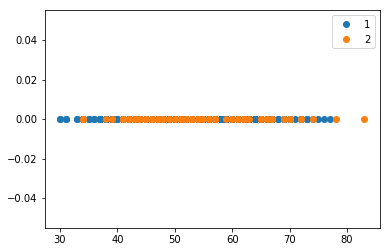

In [32]:
haberman_1 = haberman.loc[haberman["surv_status"] == 1];
haberman_2 = haberman.loc[haberman["surv_status"] == 2];

plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'o')
plt.legend(["1","2"])
   
plt.show()

#### OBSERVATION :
There is a massive overlap between the datapoints of both the classes.

## 1.1. PDF

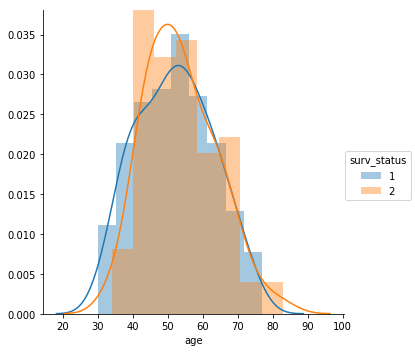

In [20]:
sns.FacetGrid(haberman, hue="surv_status", size =5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

#### OBSERVATION :
1. the number of patients who survived 5 years or more is higher till the of 40.
2. the number of patients who dies within 5 years is higher between the age 40 to 60.

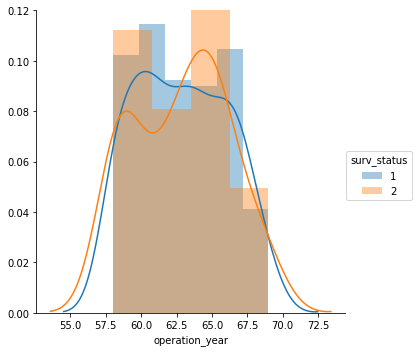

In [21]:
sns.FacetGrid(haberman, hue="surv_status", size = 5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.show();

#### OBSERVATION :
1. more number of people survived 5 years of more whose operation took place between 1958 and 1962.
2. more number of people died within 5 years whose operation took place between 1962 and 1970.

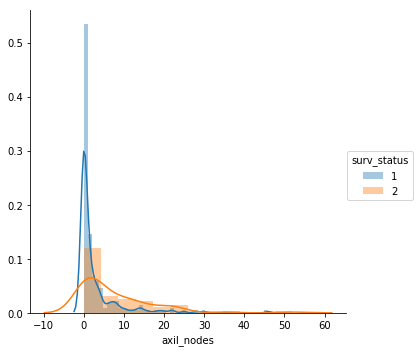

In [22]:
sns.FacetGrid(haberman, hue="surv_status", size = 5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

#### OBSERVATION :
1. A large number of patients survived 5 years or more who had 0 positive axillary nodes. 

## 1.2. CDF

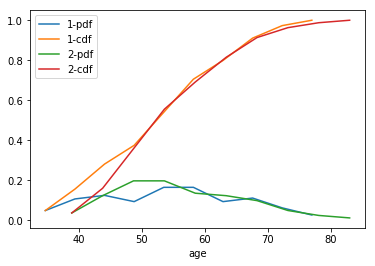

In [28]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, density =True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

counts, bin_edges = np.histogram(haberman_2['age'], bins=10, density =True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.legend(["1-pdf","1-cdf","2-pdf","2-cdf"])
plt.xlabel("age")

plt.show()

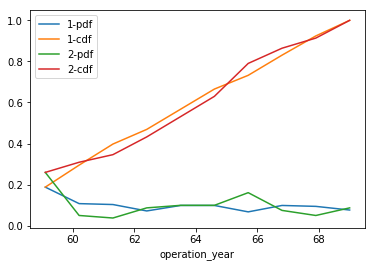

In [29]:
counts, bin_edges = np.histogram(haberman_1['operation_year'], bins=10, density =True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

counts, bin_edges = np.histogram(haberman_2['operation_year'], bins=10, density =True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.legend(["1-pdf","1-cdf","2-pdf","2-cdf"])
plt.xlabel("operation_year")

plt.show()

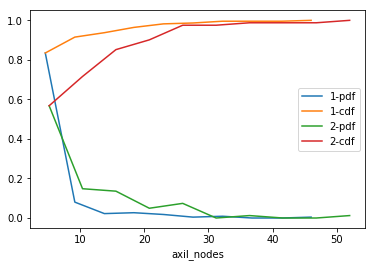

In [30]:
counts, bin_edges = np.histogram(haberman_1['axil_nodes'], bins=10, density =True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

counts, bin_edges = np.histogram(haberman_2['axil_nodes'], bins=10, density =True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.legend(["1-pdf","1-cdf","2-pdf","2-cdf"])
plt.xlabel("axil_nodes")

plt.show()

## 1.3. BOX PLOTS AND VIOLIN PLOTS

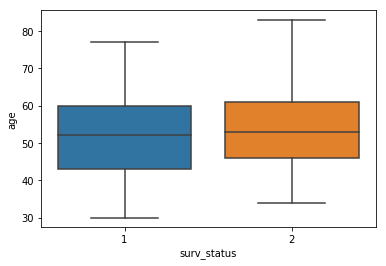

In [34]:
sns.boxplot(x='surv_status', y = 'age', data = haberman)
plt.show()

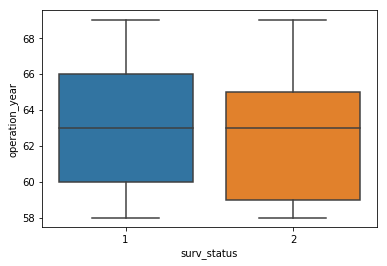

In [21]:
sns.boxplot(x='surv_status', y='operation_year', data = haberman)
plt.show()

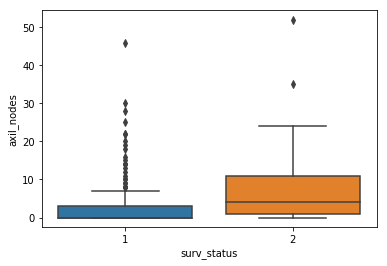

In [22]:
sns.boxplot(x='surv_status', y='axil_nodes', data = haberman)
plt.show()

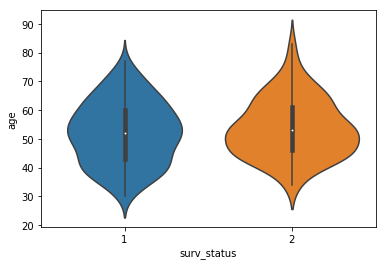

In [25]:
sns.violinplot(x='surv_status', y='age', data= haberman)
plt.show()

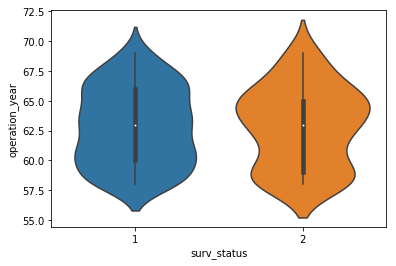

In [26]:
sns.violinplot(x='surv_status', y='operation_year', data= haberman)
plt.show()

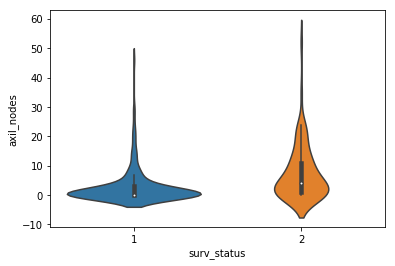

In [27]:
sns.violinplot(x='surv_status', y='axil_nodes', data= haberman)
plt.show()

#### OBJECTIVE : 
1. The chances of death within 5 years of operation increases with the number of axillary nodes.
2. 75% of patients who died within 5 years of operation had less than 12 positive axillary nodes.
3. 75% of patients who survived 5 years or more had less than 4 axillary nodes.

## 2. BI-VARIATE ANALYSIS

## 2.1. SCATTER PLOTS

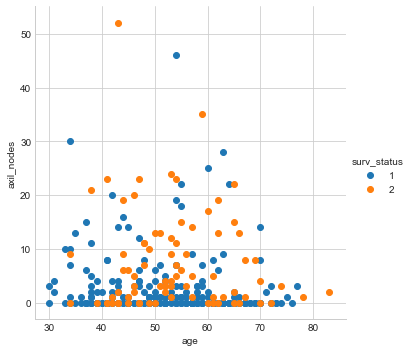

In [34]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size = 5) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show()

#### OBSERVATION :
The number of patients who survive 5 or more years is high when positive axillary nodes are not present. 

## 2.2. PAIR PLOTS

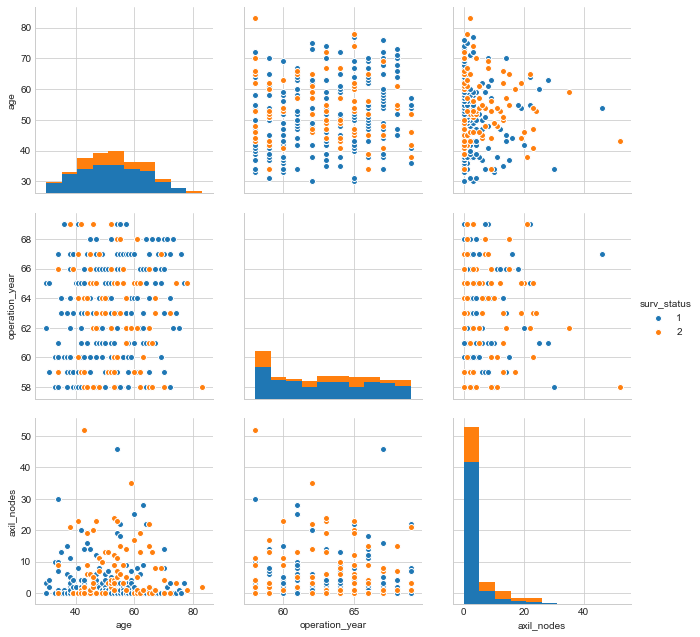

In [38]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="surv_status", vars = ["age", "operation_year","axil_nodes"], size = 3);
plt.show()

#### OBSERVATION :
1. The posibility of having 1 or more positive axil nodes is high between the age of 40 and 70.
2. number of axillary nodes play a major role in deciding the class in which patients fall.

## MULTIVARIATE ANALYSIS :

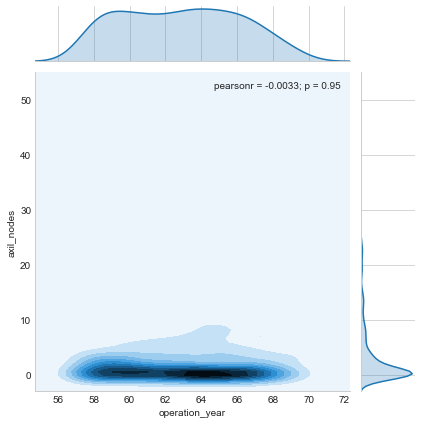

In [42]:
sns.jointplot(x="operation_year", y="axil_nodes", data=haberman, kind="kde");
plt.show();

## CONCLUSION :

1. There are 306 datapoints and 4 attributes including class label.
2. The dataset is unbalanced as we have a major difference in the number of datapoints belonging to each of the classes.
3. 224 patients survived for 5 or more years.
4. 81 patients dies within 5 years.
5. There is a massive overlap between the datapoints of both the classes.
6. the number of patients who survived 5 years or more is higher till the of 40.
7. the number of patients who died within 5 years is higher between the age 40 to 60.
8. more number of people survived 5 years of more whose operation took place between 1958 and 1962.
9. more number of people died within 5 years whose operation took place between 1962 and 1970.
10. A large number of patients survived 5 years or more who had 0 positive axillary nodes.
11. The chances of death within 5 years of operation increases with the number of axillary nodes.
12. 75% of patients who died within 5 years of operation had less than 12 positive axillary nodes.
13. 75% of patients who survived 5 years or more had less than 4 axillary nodes.
14. The number of patients who survive 5 or more years is high when positive axillary nodes are not present.
15. The posibility of having 1 or more positive axil nodes is high between the age of 40 and 70.
16. number of axillary nodes play a major role in deciding the class in which patients fall.